## COMP 6934 Winter 2025 In class Work 6

Multi-plot methods in matplotlib.

The dataset is the same as problem set 2 through 5, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

Use the improved data set weather.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem set 6

## Problem 6.1

* Plot the monthly average temperature for four different weather stations for the years 2020 to 2023 inclusive.
    * Weather stations are your own choice, make sure the ones you choose have data for the years requested
    * You can use one or more of the files from the data collection
    * Reduce, aggregrate, and clean any zeros in the data set using techniques from previous notes and problems
    * Plot the temperatures as separate lines on the same axes
    * Include labels and legends to identify the plot lines from each station

In [2]:
df_NL = pd.read_csv('Data/NL_weather.csv',low_memory=False)

In [3]:
df_NL['Station Name'].unique()

array(['ARGENTIA (AUT)', 'BADGER (AUT)', "BAY D'ESPOIR GEN STN",
       'BONAVISTA', 'BURGEO NL', 'BURNT POND', 'BUTLERVILLE',
       'CAPE RACE (AUT)', 'CHARLESTON', 'CORMACK RCS', 'CORNER BROOK',
       'COW HEAD', 'DANIELS HARBOUR', "DANIEL'S HARBOUR", 'DEER LAKE',
       'DEER LAKE A', 'ENGLEE (AUT)', 'FEROLLE POINT (AUT)',
       'GANDER INTL A', 'GANDER AIRPORT CS', 'HARBOUR BRETON',
       'INDIAN BAY B.B.', 'LA SCIE', 'LETHBRIDGE', 'MIDDLE ARM',
       'MILLERTOWN RCS', 'PLUM POINT', 'PORT AUX BASQUES',
       'ROCKY HARBOUR CS', 'SAGONA ISLAND', 'ST. ANTHONY A', 'ST ANTHONY',
       "ST. JOHN'S INTL A", 'ST JOHNS WEST CLIMATE', 'ST LAWRENCE',
       'SOPS ARM WHITE BAY', 'STEPHENVILLE A', 'STEPHENVILLE RCS',
       'SWIFT CURRENT', 'TERRA NOVA NAT PARK CS', 'TWILLINGATE (AUT)',
       'WINTERLAND', 'WINTERLAND BRANCH HILL', 'WRECKHOUSE',
       'GRATES COVE', 'POOLS ISLAND', 'MAIN BROOK', 'MARTICOT ISLAND',
       "MCIVER'S", 'CAPE KAKKIVIAK', 'CARTWRIGHT A', 'CHURCHILL FALLS'

In [4]:
# St. Jhon's Station.
df_st = df_NL[df_NL['Station Name'].str.contains("ST. JOHN'S INTL") & (df_NL['Year'] >= 2020)
                    & (df_NL['Year'] <=2023 )].reset_index() # reset index will force a new df and not a slice.
# COW HEAD Station.
df_nain = df_NL[df_NL['Station Name'].str.contains("NAIN") & (df_NL['Year'] >= 2020)
                    & (df_NL['Year'] <=2023 )].reset_index()
# DEER LAKE Statino.
df_deer = df_NL[df_NL['Station Name'].str.contains("DEER LAKE") & (df_NL['Year'] >= 2020)
                    & (df_NL['Year'] <=2023 )].reset_index()
# LA SCIE Station.
df_la = df_NL[df_NL['Station Name'].str.contains("LA SCIE") & (df_NL['Year'] >= 2020)
                    & (df_NL['Year'] <=2023 )].reset_index()

In [5]:
# Convert date to date timestrap.
df_st['Date/Time'] = pd.to_datetime(df_st['Date/Time']).dt.to_period('M')
df_nain['Date/Time'] = pd.to_datetime(df_nain['Date/Time']).dt.to_period('M')
df_deer['Date/Time'] = pd.to_datetime(df_deer['Date/Time']).dt.to_period('M')
df_la['Date/Time'] = pd.to_datetime(df_la['Date/Time']).dt.to_period('M')

In [6]:
stj = df_st.groupby('Date/Time')['Mean Temp (C)'].mean().reset_index()
stj.dropna()
nain = df_nain.groupby('Date/Time')['Mean Temp (C)'].mean().reset_index()
nain.dropna()
deer = df_deer.groupby('Date/Time')['Mean Temp (C)'].mean().reset_index()
deer.dropna()
la = df_la.groupby('Date/Time')['Mean Temp (C)'].mean().reset_index()
la.dropna()

,Date/Time,Mean Temp (C)
0,2020-01,-8.254839
1,2020-02,-8.137931
2,2020-03,-5.806452
3,2020-04,-0.193333
4,2020-05,5.096774
5,2020-06,11.482759
6,2020-07,14.413793
7,2020-08,15.900000
8,2020-09,12.893333
9,2020-10,6.445161


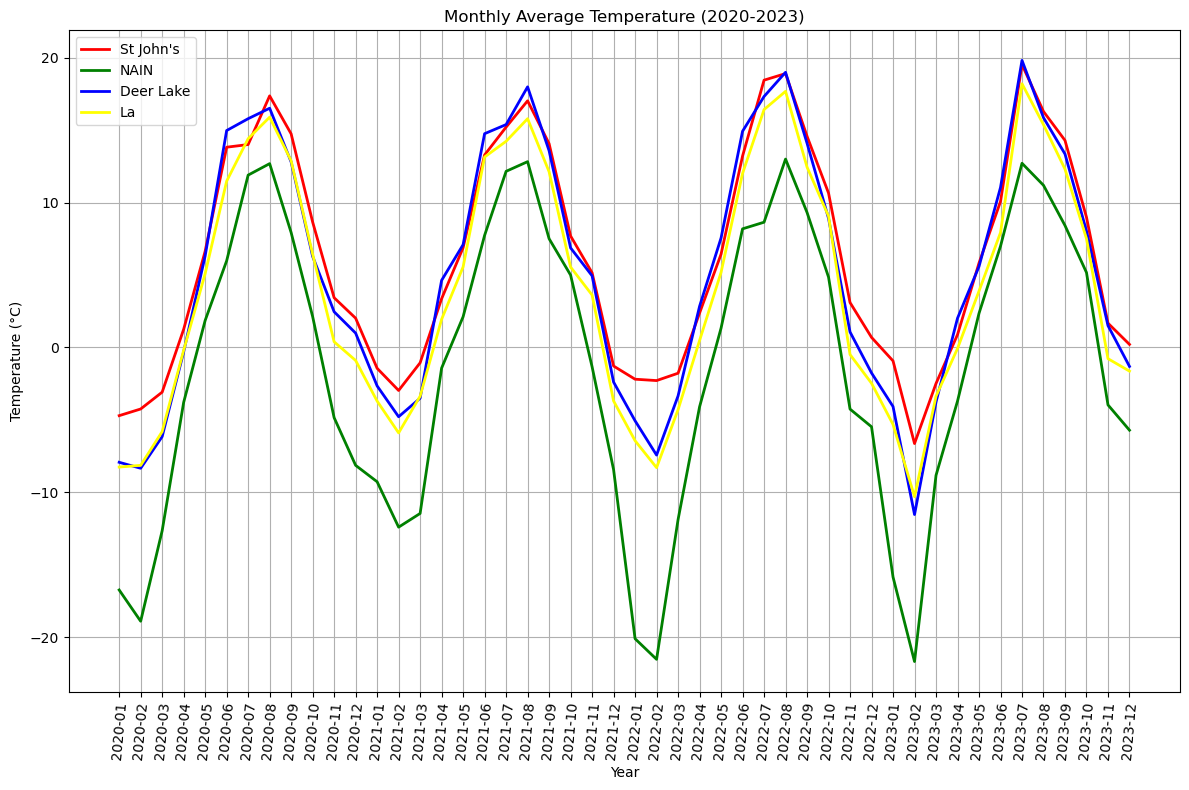

In [7]:
# Ensure stj, cow, deer, and la are properly aligned with the x-axis
#months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Ensure 'Month' is in a string format for plotting
stj['Date/Time'] = stj['Date/Time'].astype(str)
nain['Date/Time'] = nain['Date/Time'].astype(str)
deer['Date/Time'] = deer['Date/Time'].astype(str)
la['Date/Time'] = la['Date/Time'].astype(str)

plt.figure(figsize=(12, 8))

# Plot each dataset with unique labels
plt.plot(stj['Date/Time'], stj['Mean Temp (C)'], color='red', linewidth=2, linestyle='-', label="St John's")
plt.plot(nain['Date/Time'], nain['Mean Temp (C)'], color='green', linewidth=2, linestyle='-', label='NAIN')
plt.plot(deer['Date/Time'], deer['Mean Temp (C)'], color='blue', linewidth=2, linestyle='-', label='Deer Lake')
plt.plot(la['Date/Time'], la['Mean Temp (C)'], color='yellow', linewidth=2, linestyle='-', label='La')

# Correct x-axis labels
plt.xticks(rotation=85)

# Add title, labels, and legend
plt.title("Monthly Average Temperature (2020-2023)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Problem 6.2

* Plot the same data for problem 6.2 using different axes for each weather station.
    * You can use subplots or create the axes independently.                                                  

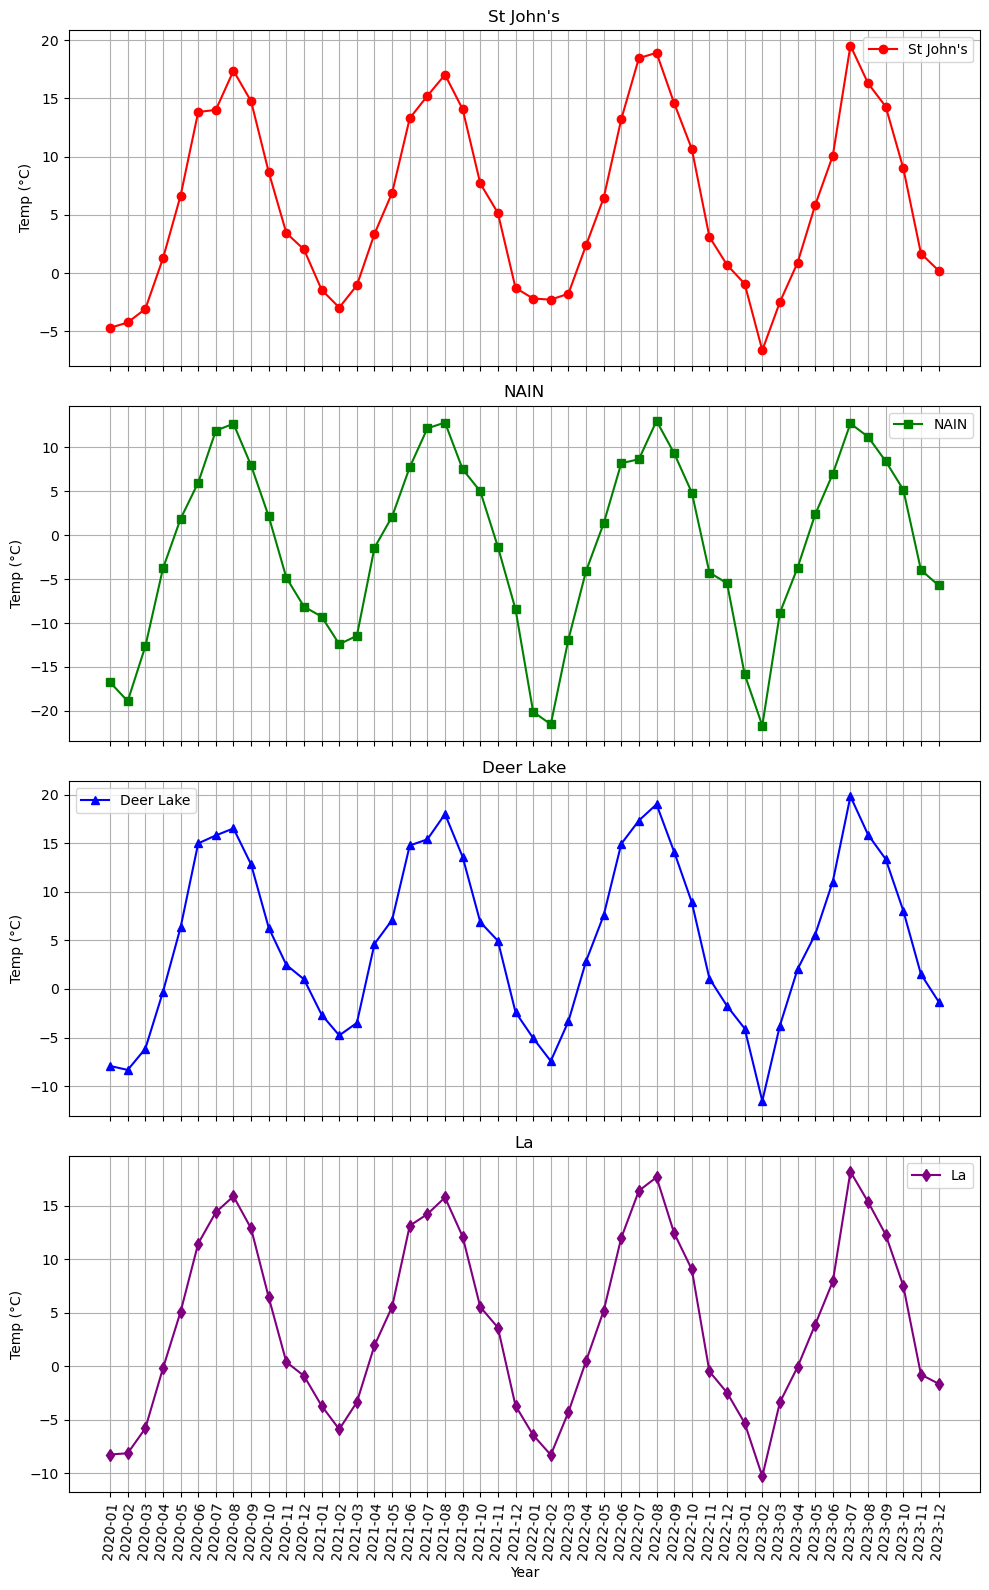

In [8]:
# Create subplots with separate axes for each weather station
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 16), sharex=True)

# Plot each dataset
ax0.plot(stj['Date/Time'], stj['Mean Temp (C)'], marker='o', linestyle='-', color='red', label="St John's")
ax0.set_title("St John's")
ax0.set_ylabel("Temp (°C)")
ax0.grid(True)
ax0.legend()

ax1.plot(nain['Date/Time'], nain['Mean Temp (C)'], marker='s', linestyle='-', color='green', label='NAIN')
ax1.set_title("NAIN")
ax1.set_ylabel("Temp (°C)")
ax1.grid(True)
ax1.legend()

ax2.plot(deer['Date/Time'], deer['Mean Temp (C)'], marker='^', linestyle='-', color='blue', label='Deer Lake')
ax2.set_title("Deer Lake")
ax2.set_ylabel("Temp (°C)")
ax2.grid(True)
ax2.legend()

ax3.plot(la['Date/Time'], la['Mean Temp (C)'], marker='d', linestyle='-', color='purple', label='La')
ax3.set_title("La")
ax3.set_ylabel("Temp (°C)")
ax3.set_xlabel("Year")
ax3.grid(True)
ax3.legend()

# Correct x-axis labels
plt.xticks(rotation=85)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |